In [71]:
import CustomProcessingV_0_2

In [72]:
train_path = "Data/train/"
test_path = "Data/val/"

In [73]:

numberOfClass,train_data,test_data = CustomProcessingV_0_2.class_number_and_data(train_path,test_path,augmentation=True)

Found 3770 images belonging to 7 classes.
Found 420 images belonging to 7 classes.


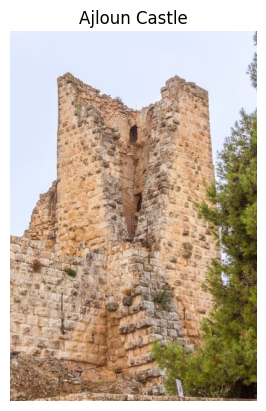

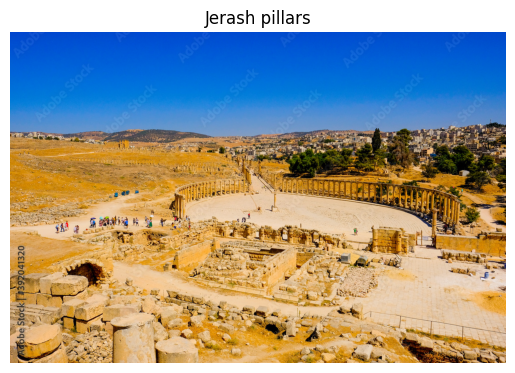

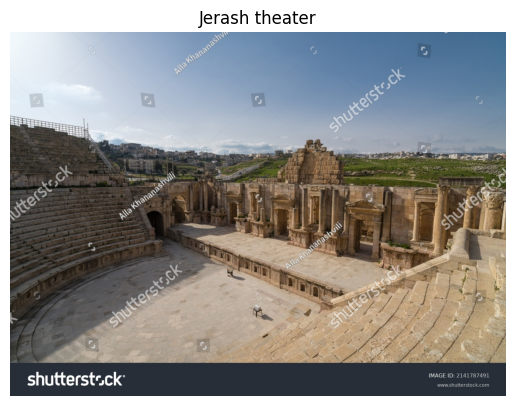

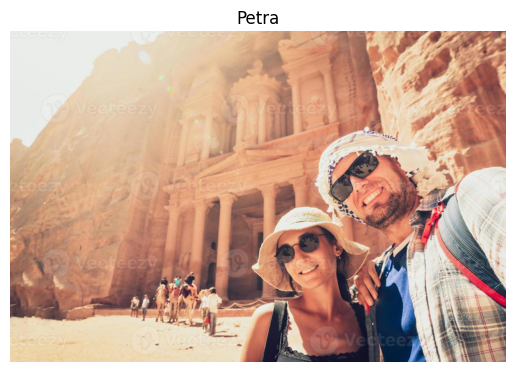

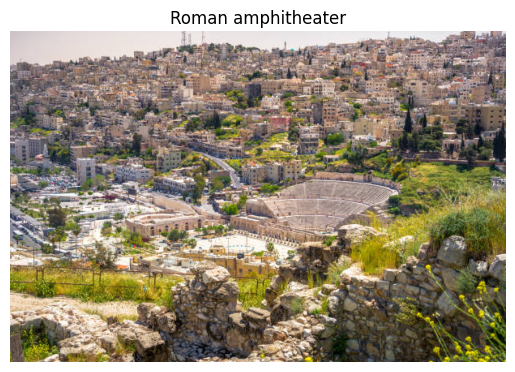

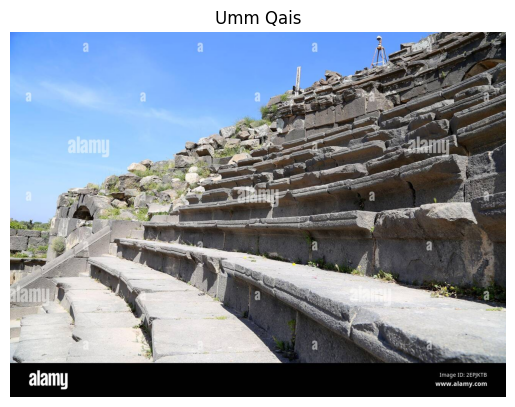

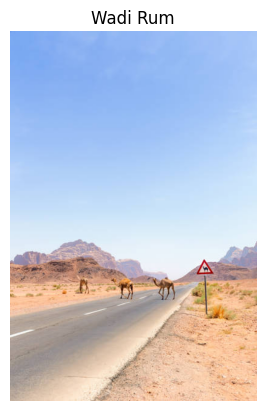

In [74]:
CustomProcessingV_0_2.sample_visulization(train_path)

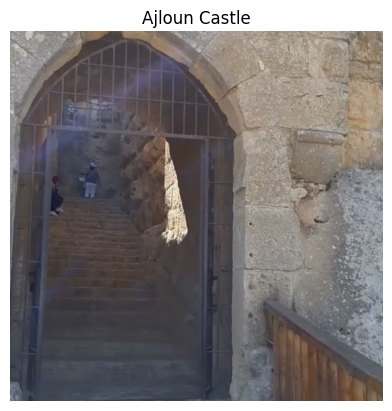

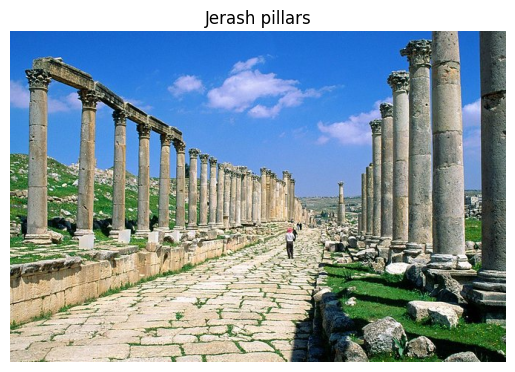

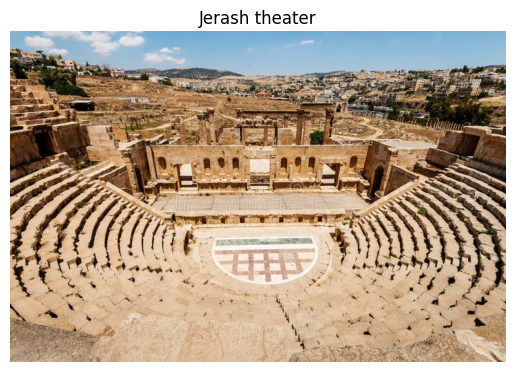

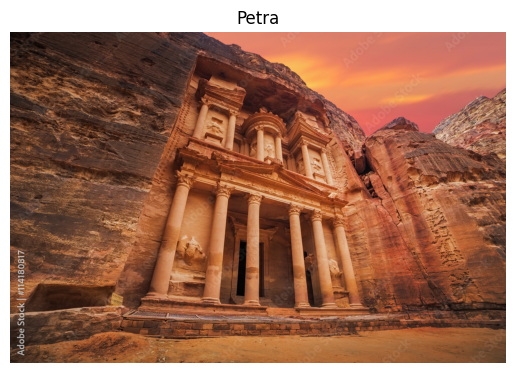

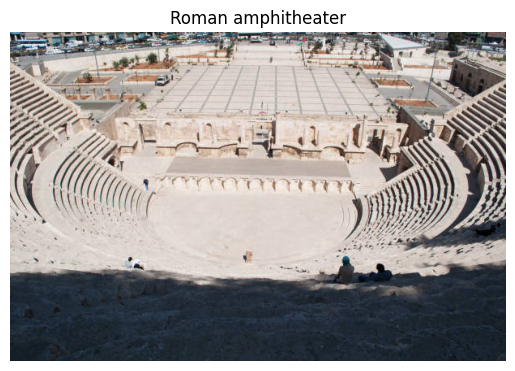

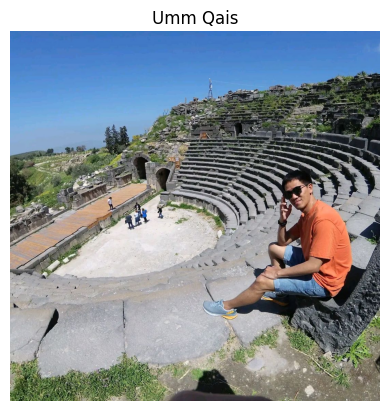

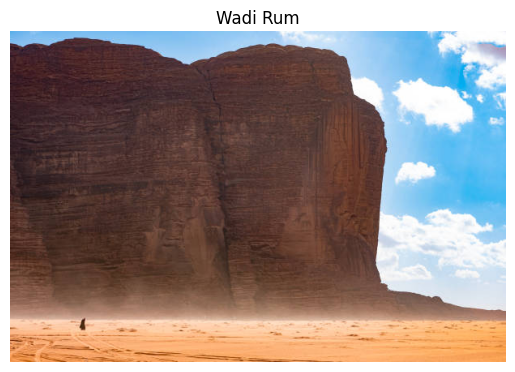

In [75]:
CustomProcessingV_0_2.sample_visulization(test_path)

In [76]:
Model=CustomProcessingV_0_2.model_create(numberOfClass)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [77]:
Model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [78]:
batch_size = 32
checkpoint_best,checkpoint_last = CustomProcessingV_0_2.creat_checkpoint("Resnet50")
hist_Resnet50 = Model.fit_generator(train_data, validation_data=test_data, epochs=150, callbacks=[checkpoint_best, checkpoint_last])

C:\Users\WB GAMING\AppData\Local\Temp\ipykernel_11876\1085832037.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_Resnet50 = Model.fit_generator(train_data, validation_data=test_data, epochs=150, callbacks=[checkpoint_best, checkpoint_last])


Epoch 1/150
118/118 [==============================] - ETA: 0s - loss: 2.1473 - accuracy: 0.1631
Epoch 1: val_loss improved from inf to 1.90680, saving model to ./models\best_Resnet50.h5


c:\Users\WB GAMING\Desktop\New folder (5)\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: saving model to ./models\last_Resnet50.h5
118/118 [==============================] - 151s 1s/step - loss: 2.1473 - accuracy: 0.1631 - val_loss: 1.9068 - val_accuracy: 0.2190
Epoch 2/150
118/118 [==============================] - ETA: 0s - loss: 1.8573 - accuracy: 0.2451
Epoch 2: val_loss did not improve from 1.90680

Epoch 2: saving model to ./models\last_Resnet50.h5
118/118 [==============================] - 146s 1s/step - loss: 1.8573 - accuracy: 0.2451 - val_loss: 1.9341 - val_accuracy: 0.2214
Epoch 3/150
118/118 [==============================] - ETA: 0s - loss: 1.7913 - accuracy: 0.2809
Epoch 3: val_loss improved from 1.90680 to 1.71266, saving model to ./models\best_Resnet50.h5

Epoch 3: saving model to ./models\last_Resnet50.h5
118/118 [==============================] - 146s 1s/step - loss: 1.7913 - accuracy: 0.2809 - val_loss: 1.7127 - val_accuracy: 0.2929
Epoch 4/150
118/118 [==============================] - ETA: 0s - loss: 1.7663 - accuracy: 0.2761
Epoch 4: val_los

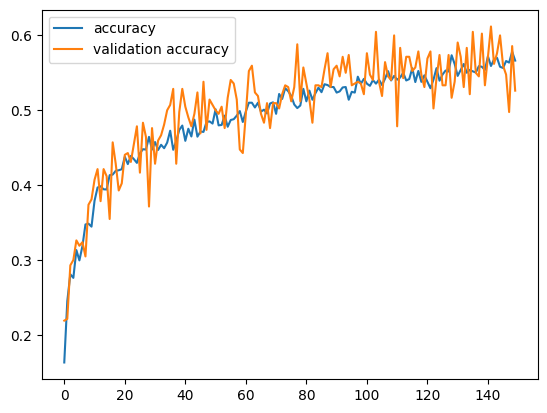

In [79]:
CustomProcessingV_0_2.accuracy_plt(hist_Resnet50)

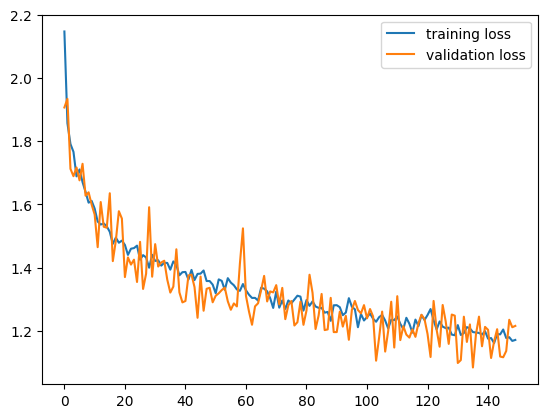

In [80]:
CustomProcessingV_0_2.loss_plt(hist_Resnet50)

In [86]:
import numpy as np
img_path = "Data/val/Petra/d33.jpg"
z=(CustomProcessingV_0_2.testing(img_path,Model))
print(CustomProcessingV_0_2.mux(z))

1/1 [==============================] - 0s 61ms/step
('Petra', 0.9811999)


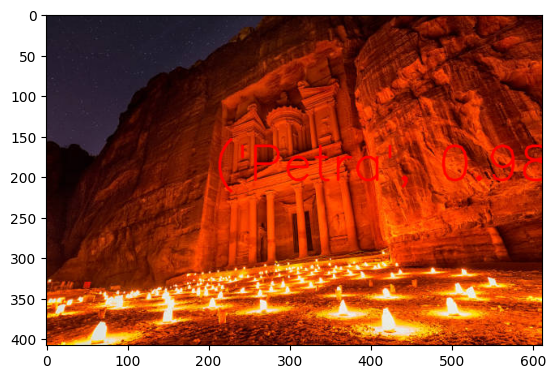

In [87]:
CustomProcessingV_0_2.plot_result(img_path,CustomProcessingV_0_2.mux(z))

14/14 [==============================] - 11s 701ms/step


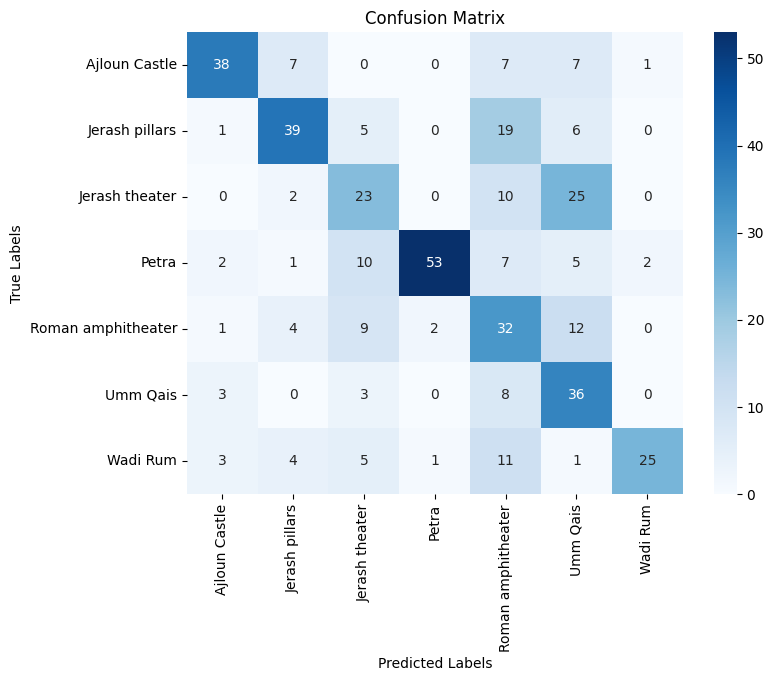

Accuracy: 0.5721
Precision: 0.6531
Recall: 0.5721
F1 Score: 0.5905

Classification Report:
                    precision    recall  f1-score   support

     Ajloun Castle       0.79      0.63      0.70        60
    Jerash pillars       0.68      0.56      0.61        70
    Jerash theater       0.42      0.38      0.40        60
             Petra       0.95      0.66      0.78        80
Roman amphitheater       0.34      0.53      0.42        60
          Umm Qais       0.39      0.72      0.51        50
          Wadi Rum       0.89      0.50      0.64        50

          accuracy                           0.57       430
         macro avg       0.64      0.57      0.58       430
      weighted avg       0.65      0.57      0.59       430



In [88]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


model = load_model('models\last_Resnet50.h5')

data_directory = 'Data/val'
class_names = os.listdir(data_directory)

images = []
true_labels = []
def preprocess_image(path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 

    return img_array

for class_name in class_names:
    class_path = os.path.join(data_directory, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        image = tf.keras.preprocessing.image.img_to_array(image)/255
        
        images.append(image)

        true_labels.append(class_name)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
true_labels_numeric = label_encoder.fit_transform(true_labels)


predictions = model.predict(np.array(images))
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(true_labels_numeric, predicted_labels)
precision = precision_score(true_labels_numeric, predicted_labels, average='weighted')
recall = recall_score(true_labels_numeric, predicted_labels, average='weighted')
f1 = f1_score(true_labels_numeric, predicted_labels, average='weighted')

conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(true_labels_numeric, predicted_labels, target_names=class_names)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

print('\nClassification Report:')
print(class_report)